# Linear convolution implementation in Python

In this notebook we work to develop the basic convolution algorithm that will be parallelized in later implementations. We also test said algorithm using multiple different kernels.

In [1]:
import numpy as np
import tifffile as tiff
import glob

# Load image(s) from tif file
fnames = glob.glob('../Data/three_band/60?0_3_*.tif')
print(fnames)
imgs = []
for f in fnames:
    imgs.append(np.array(tiff.imread(f)))

print('Number of loaded images: {}'.format(len(imgs)))

['../Data/three_band/6030_3_4.tif', '../Data/three_band/6020_3_4.tif', '../Data/three_band/6090_3_4.tif', '../Data/three_band/6080_3_4.tif', '../Data/three_band/6030_3_3.tif', '../Data/three_band/6020_3_3.tif', '../Data/three_band/6080_3_0.tif', '../Data/three_band/6090_3_0.tif', '../Data/three_band/6090_3_1.tif', '../Data/three_band/6080_3_1.tif', '../Data/three_band/6020_3_2.tif', '../Data/three_band/6030_3_2.tif', '../Data/three_band/6020_3_0.tif', '../Data/three_band/6030_3_0.tif', '../Data/three_band/6090_3_3.tif', '../Data/three_band/6080_3_3.tif', '../Data/three_band/6080_3_2.tif', '../Data/three_band/6090_3_2.tif', '../Data/three_band/6030_3_1.tif', '../Data/three_band/6020_3_1.tif', '../Data/three_band/6040_3_3.tif', '../Data/three_band/6050_3_3.tif', '../Data/three_band/6050_3_2.tif', '../Data/three_band/6040_3_2.tif', '../Data/three_band/6050_3_0.tif', '../Data/three_band/6040_3_0.tif', '../Data/three_band/6040_3_1.tif', '../Data/three_band/6050_3_1.tif', '../Data/three_band

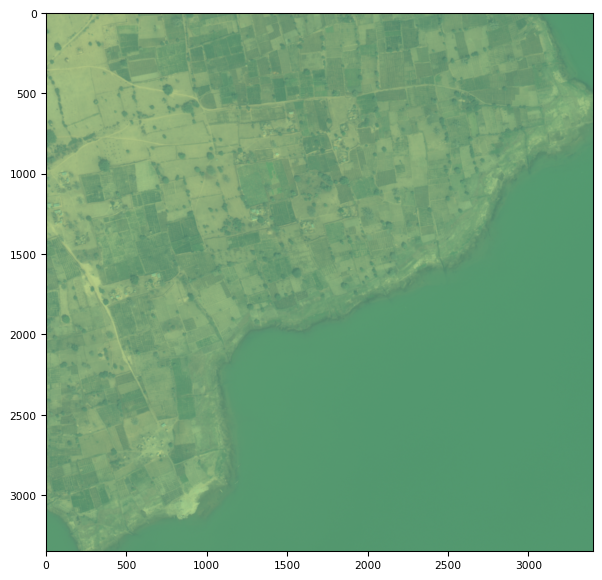

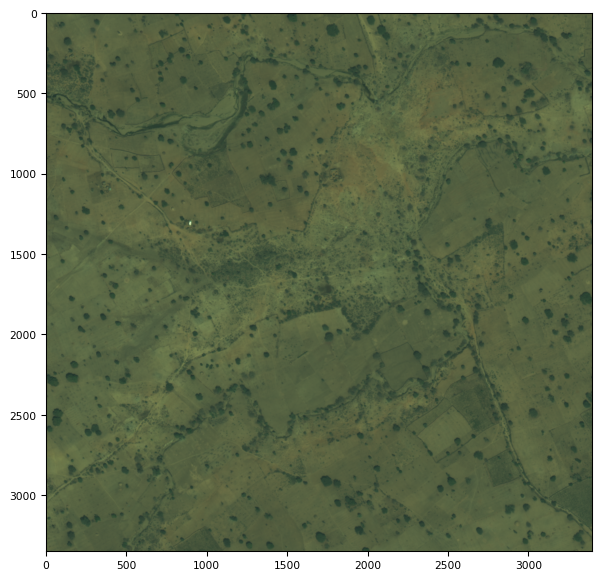

In [2]:
%matplotlib inline
for i in imgs[0:2]:
    tiff.imshow(i)

In [3]:
def conv(img, kernel, *kwargs):
    # Compute padding size
    padding = ((0,0),(1,1),(1,1))

    # Add zero-padding to the image
    padded_img = np.pad(img, padding, mode='constant')

    # Create an empty result array
    result = np.empty_like(img)

    row_count = 0
    col_count = 0

    # Perform 2D convolution using nested loops
    for k in range(padded_img.shape[0]):
        print('{}/{} channels convoluted'.format(k, padded_img.shape[0]))
        for i in range(1, padded_img.shape[1]-2):
            row_count += 1
            for j in range(1, padded_img.shape[2]-2):
                col_count += 1
                #print('row -> {} ; col -> {}'.format(i, j))
                result[k,i,j] = np.sum(kernel * padded_img[k, i-1:i+2, j-1:j+2])

    print('{}/{} channels convoluted'.format(padded_img.shape[0], padded_img.shape[0]))
   
    # Save the result as a new tif file
    if (len(kwargs) >= 1):
        if (type(kwargs[0]) == str):
            tiff.imsave('./{}.tif'.format(kwargs[0]), result)
        else:
            print('Warning: Image was convoluted, but file could not be saved due to incorrect name type.')
    
    return(result)

## Testing convolution function with different edge detecting kernels
Project convolution

Convoluting image 0/45...
0/3 channels convoluted
1/3 channels convoluted
2/3 channels convoluted
3/3 channels convoluted
Convoluting image 1/45...
0/3 channels convoluted
1/3 channels convoluted
2/3 channels convoluted
3/3 channels convoluted


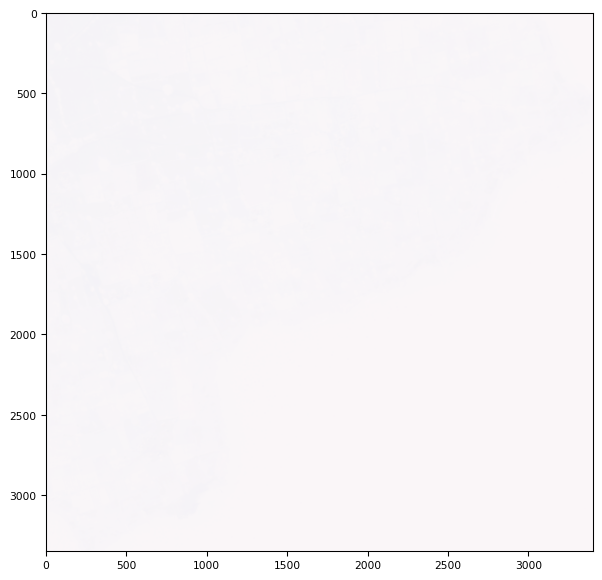

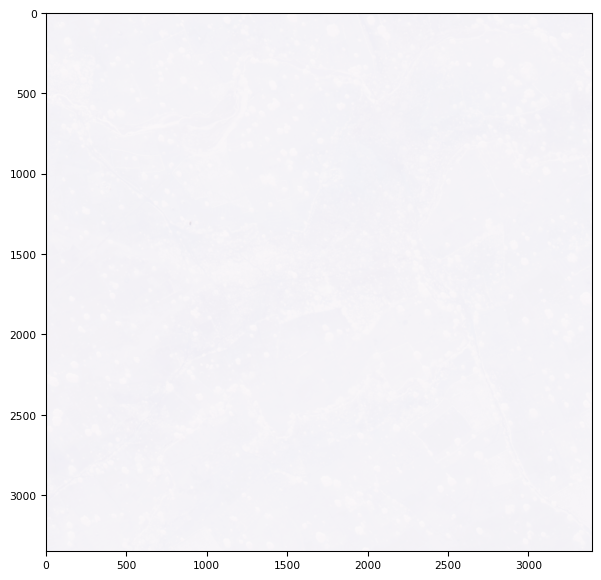

In [55]:
kernel_proj = np.array([[1, 2, 1], [2, -16, 2], [1, 2, 1]])
convimgs_proj=[]
for i, img in enumerate(imgs[0:2]):
    print('Convoluting image {}/{}...'.format(i, len(imgs)))
    convimgs_proj.append(conv(img, kernel_proj))

%matplotlib inline
for i, convimg in enumerate(convimgs_proj):
    tiff.imshow(convimg)

Ridge detection:

Convoluting image 0/45...
0/3 channels convoluted
1/3 channels convoluted
2/3 channels convoluted
3/3 channels convoluted
Convoluting image 1/45...
0/3 channels convoluted
1/3 channels convoluted
2/3 channels convoluted
3/3 channels convoluted


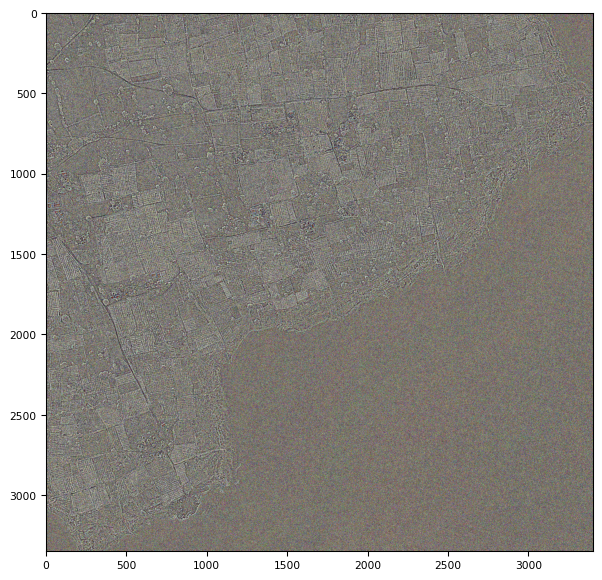

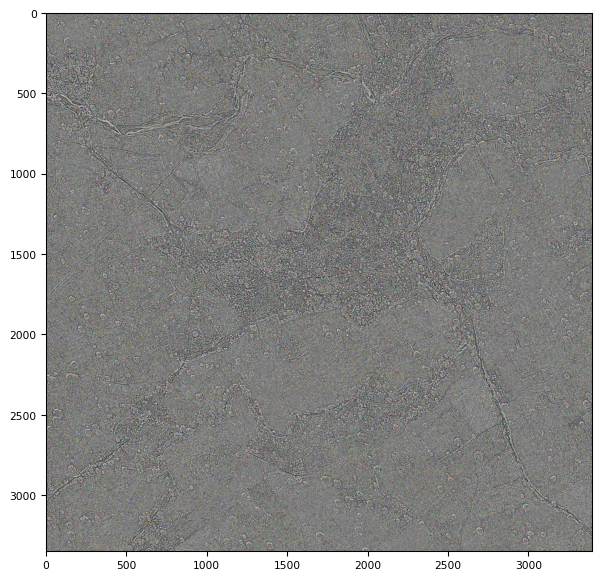

In [56]:
kernel_edge1 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
convimgs_edge1 = []
for i, img in enumerate(imgs[0:2]):
    print('Convoluting image {}/{}...'.format(i, len(imgs)))
    convimgs_edge1.append(conv(img, kernel_edge1))

%matplotlib inline
for i, convimg in enumerate(convimgs_edge1):
    tiff.imshow(convimg)

Edge detection:

Convoluting image 0/45...
0/3 channels convoluted
1/3 channels convoluted
2/3 channels convoluted
3/3 channels convoluted
Convoluting image 1/45...
0/3 channels convoluted
1/3 channels convoluted
2/3 channels convoluted
3/3 channels convoluted


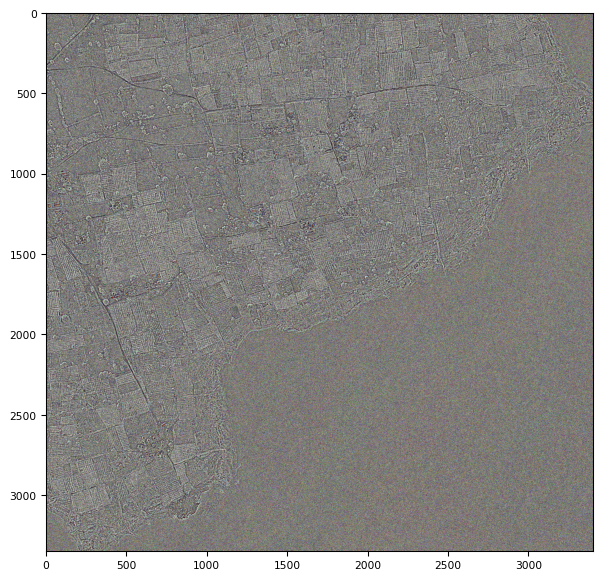

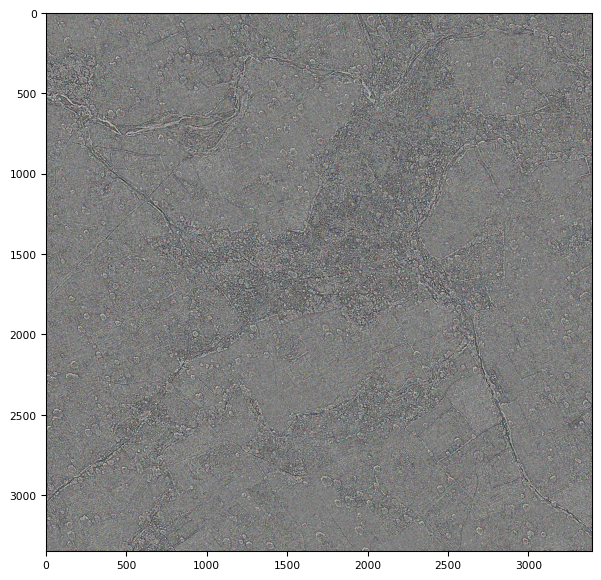

In [59]:
kernel_edge2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
convimgs_edge2 = []
for i, img in enumerate(imgs[0:2]):
    print('Convoluting image {}/{}...'.format(i, len(imgs)))
    convimgs_edge2.append(conv(img, kernel_edge2))

%matplotlib inline
for i, convimg in enumerate(convimgs_edge2):
    tiff.imshow(convimg)

The kernel given for this project does not work well for edge detection. However, the last two tested show promising results for this purpose. Although the results for these two look roughly the same, upon closer examination, the second kernel is arguably marginally better than the first one and will therefore be the one used for further implementations of the convolution algorithm developed here.

# Tiff Viewer

In [2]:
import numpy as np
import tifffile as tiff
import glob
import matplotlib.pyplot

(3348, 3400, 4)


(<Figure size 988.8x604.8 with 1 Axes>,
 <AxesSubplot: >,
 <matplotlib.image.AxesImage at 0x177d11c10>)

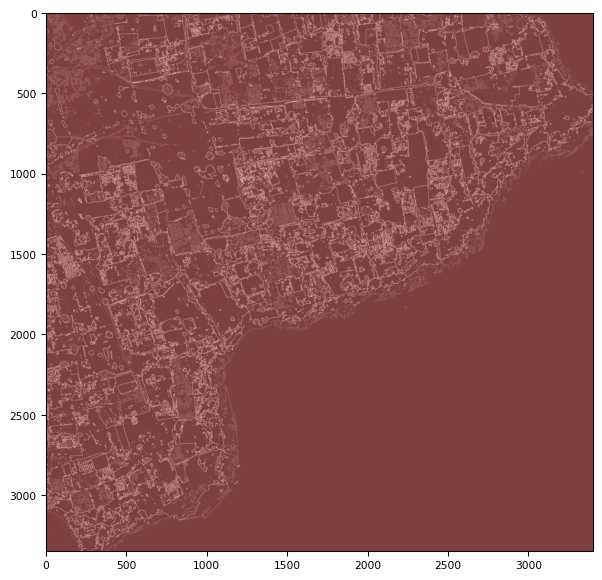

In [6]:
fname = '../conv_img_0.tiff'
img = tiff.imread(fname)
print(img.shape)
tiff.imshow(img)

(3, 3348, 3400)


(<Figure size 988.8x604.8 with 1 Axes>,
 <AxesSubplot: >,
 <matplotlib.image.AxesImage at 0x177e13a90>)

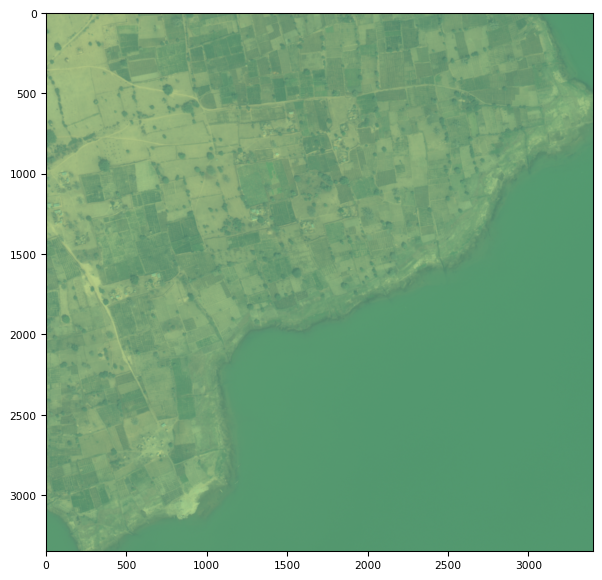

In [8]:
fname = '../data/three_band/6030_3_4.tif'
img = tiff.imread(fname)
print(img.shape)
tiff.imshow(img)